Bank Customer Dataset Structure Guide
---
## Dataset Overview
- **Total Columns**: 41
- **Sample Size**: 675 respondents (German bank customers)
- **Survey Scale**: 1-7 Likert scale for construct items
- **Data Collection**: 2020, via SurveyMonkey through Respondi market research institute

---

## 1. DEMOGRAPHIC VARIABLES (6 columns)

### A_1_AGE - Age Groups
**Column Position**: 1st column
**Values and Meanings**:
- `1` = 18-24 years (7.0% of sample)
- `2` = 25-34 years (12.1% of sample)
- `3` = 35-44 years (15.7% of sample)
- `4` = 45-54 years (19.3% of sample)
- `5` = 55-65 years (27.6% of sample)
- `6` = >65 years (18.4% of sample)

### D_1_GENDER - Gender
**Column Position**: 37th column
**Values and Meanings**:
- `0` = Female (58.2% of sample - 393 respondents)
- `1` = Male (41.8% of sample - 282 respondents)

### D_2_FAMILY - Marital Status
**Column Position**: 38th column
**Values and Meanings**:
- `0` = Preferred not to answer (0.4%)
- `1` = Living alone (23.4%)
- `2` = Living with a partner (13.3%)
- `3` = Registered civil partnership (1.3%)
- `4` = Married (46.1%)
- `5` = Divorced (11.9%)
- `6` = Widowed (3.6%)

### D_3_EDUCATION - Highest Education Level
**Column Position**: 39th column
**Values and Meanings**:
- `0` = No education (0.1%)
- `1` = "Hauptschule" - completed 9th grade (5.9%)
- `2` = "Mittlere Reife" - completed 10th grade (22.7%)
- `3` = "Fachhochschulreife" - completed 12th grade (3.9%)
- `4` = Abitur (High School Diploma) (12.6%)
- `5` = Vocational training (33.9%)
- `6` = University degree (20.6%)
- `7` = Preferred not to answer (0.3%)

### D_4_EMPLOYMENT - Occupational Status
**Column Position**: 40th column
**Values and Meanings**:
- `0` = Unemployed (3.4%)
- `1` = Retired (25.9%)
- `2` = Houseman/housewife (5.2%)
- `3` = In education (1.9%)
- `4` = Studying at a university (4.9%)
- `5` = Self-employed (5.6%)
- `6` = Employed (51.0%)
- `7` = Preferred not to answer (2.1%)

### D_6_INCOME - Monthly Household Income (after taxes)
**Column Position**: 41st column (last column)
**Values and Meanings**:
- `0` = < EUR 750 (8.6%)
- `1` = EUR 750-1250 (12.4%)
- `2` = EUR 1250-2000 (21.5%)
- `3` = EUR 2000-3500 (29.0%)
- `4` = EUR 3500-5000 (12.3%)
- `5` = > EUR 5000 (3.0%)
- `6` = Preferred not to answer (13.2%)

---

## 2. CONSTRUCT VARIABLES (35 columns)

All construct items use a **7-point Likert scale**: 1 = "do not at all agree" to 7 = "do completely agree"

### FORMATIVE CONSTRUCTS (Antecedents of Reputation)

#### QUAL - Perceived Quality (6 items)
**Columns**: QUAL_1, QUAL_2, QUAL_4, QUAL_5, QUAL_6, QUA_7
- QUAL_1: "My main bank always pays great attention to my concerns"
- QUAL_2: "The range of services offered by my bank is in line with my needs"
- QUAL_4: "I consider my bank to be a trustworthy company"
- QUAL_5: "The products and services offered by my bank are of high quality"
- QUAL_6: "I think that the products and services offered by my bank are good value for money"
- QUA_7: "In my opinion, my bank is a pioneer rather than a follower in competition with other banks"

#### PERF - Perceived Performance (5 items)
**Columns**: PERF_1, PERF_2, PERF_3, PERF_4, PERF_5
- PERF_1: "My main bank is an economically stable company"
- PERF_2: "My main bank is a well-managed company"
- PERF_3: "I consider the economic risk of my main bank to be low compared to competitors"
- PERF_4: "My main bank seems to have a clear vision about the future of the company"
- PERF_5: "I believe that my main bank has growth potential"

#### CSOR - Perceived Corporate Social Responsibility (5 items)
**Columns**: CSOR_1, CSOR_2, CSOR_3, CSOR_4, CSOR_5
- CSOR_1: "I have the impression that my main bank is not only interested in profit"
- CSOR_2: "My main bank is also committed to preserving the environment"
- CSOR_3: "My main bank behaves responsibly towards society"
- CSOR_4: "I have the impression that my main bank informs the public honestly"
- CSOR_5: "I have the impression that my main bank behaves fairly towards its competitors"

#### ATTR - Perceived Attractiveness (4 items)
**Columns**: ATTR_1, ATTR_2, ATTR_3, ATTR_4
- ATTR_1: "My bank is an attractive company"
- ATTR_2: "I like the appearance of my bank (branches, logo, website, etc.)"
- ATTR_3: "In my opinion, my bank employs highly qualified staff"
- ATTR_4: "I could well imagine working for my bank"

### REFLECTIVE CONSTRUCTS (Reputation Dimensions & Outcomes)

#### LIKE - Perceived Likeability (Affective Reputation Dimension) (2 items)
**Columns**: LIKE_1, LIKE_2
- LIKE_1: "I can identify better with my main bank than with other banks"
- LIKE_2: "If my bank no longer existed, I would regret it more than with other banks"

#### COMP - Perceived Competence (Cognitive Reputation Dimension) (3 items)
**Columns**: COMP_1, COMP_2, COMP_3
- COMP_1: "My main bank is a leading provider in the market"
- COMP_2: "As far as I know, my main bank enjoys a good reputation"
- COMP_3: "I believe that my bank provides services of the highest standard"

#### SAT - Customer Satisfaction (3 items)
**Columns**: SAT_1, SAT_2, SAT_3
- SAT_1: "My main bank meets my expectations"
- SAT_2: "I have a positive attitude towards my main bank"
- SAT_3: "I prefer my main bank to other banks"

#### LOY - Customer Loyalty (3 items)
**Columns**: LOY_1, LOY_2, LOY_3
- LOY_1: "How likely is it that you will remain a customer of your bank?"
- LOY_2: "I will purchase new banking products in the future"
- LOY_3: "In the future, I will make use of other banking products or financial services offered by my bank"

#### TRUST - Relational Trust (4 items)
**Columns**: TRUST_1, TRUST_2, TRUST_3, TRUST_4
- TRUST_1: "My main bank always listens to me when I share my concerns and problems"
- TRUST_2: "My main bank always responds to my concerns and problems with constructive solutions"
- TRUST_3: "My main bank and I share the same values"
- TRUST_4: "I have the feeling that my bank always acts in accordance with the wishes of its customers"

---

## 3. THEORETICAL MODEL STRUCTURE

### Path Model Relationships:
1. **Antecedents** (QUAL, PERF, CSOR, ATTR) → **Reputation Dimensions** (COMP, LIKE)
2. **Reputation Dimensions** → **Trust & Satisfaction** (TRUST, SAT)
3. **Trust & Satisfaction** → **Customer Loyalty** (LOY)

### Key Analysis Notes:
- **Formative Constructs**: Items collectively form the construct (check for multicollinearity)
- **Reflective Constructs**: Construct causes the items (check for internal consistency)
- **Mediators**: TRUST and SAT mediate the relationship between reputation and loyalty
- **Target Variable**: Customer Loyalty (LOY) - explains 55.1% variance in the published model

---

## 4. DATA ANALYSIS CONSIDERATIONS

### Sample Characteristics to Validate:
- Predominantly middle-aged (55-65 years: 27.6%)
- Slight female majority (58.2%)
- Most common education: Vocational training (33.9%)
- Most common occupation: Employed (51.0%)
- Most common income bracket: EUR 2000-3500 (29.0%)

### Missing Data Strategy:
- Look for "Preferred not to answer" patterns in demographics
- All construct items should be complete (7-point scale responses)
- Handle income non-response appropriately (13.2% preferred not to answer)

Phase 1 — Data Loading & Initial Inspection
----
Purpose: Understand the dataset’s shape, structure, and variable types.

In [21]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
bank_df = pd.read_excel(r"C:\Users\Emigb\Documents\Data Science\Joe Bass\DataInBrief_Bankdata.xlsx")

In [3]:
#Inspecting Data
# Inspecting Data

print("Shape of DataFrame:")
print(bank_df.shape)
print()  # Blank line

print("DataFrame Info:")
print(bank_df.info())
print()  # Blank line

print("First 5 Rows:")
print(bank_df.head())


Shape of DataFrame:
(675, 41)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A_1_AGE         675 non-null    int64  
 1   LOY_1           675 non-null    int64  
 2   QUAL_1          675 non-null    int64  
 3   QUAL_2          675 non-null    int64  
 4   QUAL_4          675 non-null    int64  
 5   QUAL_5          675 non-null    int64  
 6   QUAL_6          675 non-null    int64  
 7   QUA_7           675 non-null    int64  
 8   PERF_1          675 non-null    int64  
 9   PERF_2          675 non-null    int64  
 10  PERF_3          675 non-null    int64  
 11  PERF_4          675 non-null    int64  
 12  PERF_5          675 non-null    int64  
 13  CSOR_1          675 non-null    int64  
 14  CSOR_2          675 non-null    int64  
 15  CSOR_3          675 non-null    int64  
 16  CSOR_4          675 non-null    i

In [4]:
#Standardizing Columns
bank_df.columns = (bank_df.columns.str.strip()
                  .str.lower()
                  .str.replace(' ','_')
                  .str.replace('__', '_'))

In [5]:
bank_df.head()

,a_1_age,loy_1,qual_1,qual_2,qual_4,qual_5,qual_6,qua_7,perf_1,perf_2,...,loy_3,trust_1,trust_2,trust_3,trust_4,d_1_gender,d_2_family,d_3_education,d_4_employment,d_6_income
0,4,7,7,7,7,6,6,6,7,7,...,4,7,7,7,7,1,4,2,3,4
1,5,6,4,4,5,4,4,4,4,4,...,3,4,4,4,4,1,0,6,0,0
2,3,7,7,7,7,7,7,1,7,7,...,7,7,7,7,7,0,4,5,7,4
3,3,7,7,7,7,6,6,4,7,6,...,7,6,6,4,4,1,4,3,7,4
4,2,7,6,6,6,5,6,4,7,7,...,4,7,6,6,6,1,2,6,7,0


Phase 2 — Variable Mapping
----
Purpose: Separate measurement constructs from demographics.

In [6]:
bank_df.columns

Index(['a_1_age', 'loy_1', 'qual_1', 'qual_2', 'qual_4', 'qual_5', 'qual_6',
       'qua_7', 'perf_1', 'perf_2', 'perf_3', 'perf_4', 'perf_5', 'csor_1',
       'csor_2', 'csor_3', 'csor_4', 'csor_5', 'attr_1', 'attr_2', 'attr_3',
       'attr_4', 'like_1', 'like_2', 'comp_1', 'comp_2', 'comp_3', 'sat_1',
       'sat_2', 'sat_3', 'loy_2', 'loy_3', 'trust_1', 'trust_2', 'trust_3',
       'trust_4', 'd_1_gender', 'd_2_family', 'd_3_education',
       'd_4_employment', 'd_6_income'],
      dtype='object')

In [7]:
#Defining constructs
constructs = {
    'qual':[c for c in bank_df.columns if c.startswith('qual')],
    'perf':[c for c in bank_df.columns if c.startswith('perf')],
    'csor':[c for c in bank_df.columns if c.startswith('csor')],
    'attr':[c for c in bank_df.columns if c.startswith('attr')],
    'like':[c for c in bank_df.columns if c.startswith('like')],
    'comp':[c for c in bank_df.columns if c.startswith('comp')],
    'sat':[c for c in bank_df.columns if c.startswith('sat')],
    'loy':[c for c in bank_df.columns if c.startswith('loy')],
    'trust':[c for c in bank_df.columns if c.startswith('trust')],
}

In [8]:
#Defining Demographic variables
demographics =['a_1_age','d_1_gender','d_2_family','d_3_education','d_4_employment', 'd_6_income']

Phase 3 — Missing Data Analysis
----

Purpose: Check completeness and patterns.


In [9]:
#Summarzing missing values
missing = bank_df.isnull().sum()
missing_percent = (missing/len(bank_df) * 100).round(2)
missing_df = pd.DataFrame({'count':missing, 'percent':missing_percent})
print(missing_df.sort_values('percent', ascending=False).head(10))

         count  percent
csor_5       3     0.44
loy_1        0     0.00
qual_1       0     0.00
qual_2       0     0.00
qual_4       0     0.00
qual_5       0     0.00
qual_6       0     0.00
qua_7        0     0.00
a_1_age      0     0.00
perf_1       0     0.00


In [10]:
#Dropping missing values
bank_df.dropna(subset=['csor_5'], inplace=True)

assert bank_df['csor_5'].isna().sum() == 0,"Some rows with missing values in column1 still remain."

Phase 4 — Demographic Profile Analysis
----

Purpose: Validate distributions vs PDF reference.

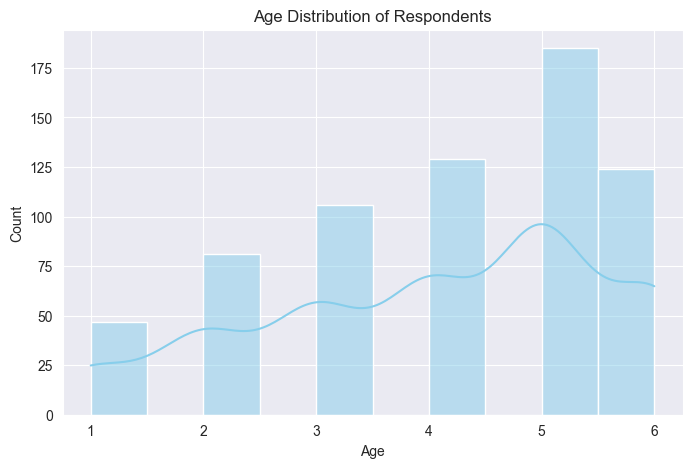

In [18]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(bank_df['a_1_age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Income distribution is right-skewed, with most respondents earning in the lower-to-mid ranges. A few high-income outliers are present.**

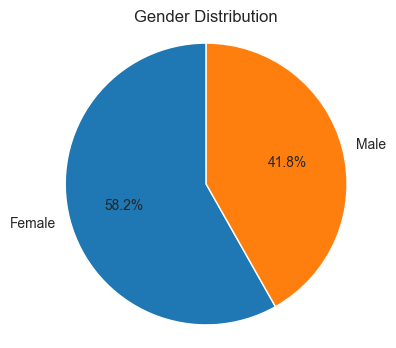

In [35]:
# 2. Gender Distribution
gender_map = {1: 'Female', 0: 'Male'}
gender_counts = (bank_df['d_1_gender'].map(gender_map).value_counts(normalize=True) * 100)
# Create pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

**The dataset is balanced between male and female respondents, with only a small difference. This ensures gender-related insights won’t be overly biased.**

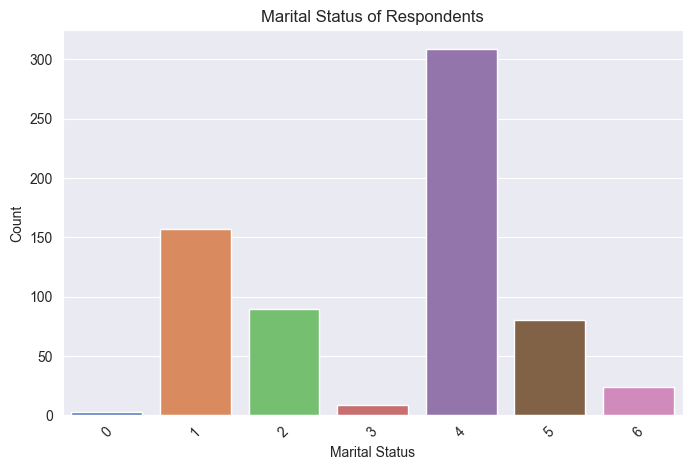

In [27]:
# 3. Marital status distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='d_2_family', data=bank_df, palette='muted')
plt.title('Marital Status of Respondents')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Most respondents are single, followed by married individuals. Other categories such as divorced or widowed are fewer, which may have limited impact on overall patterns.**

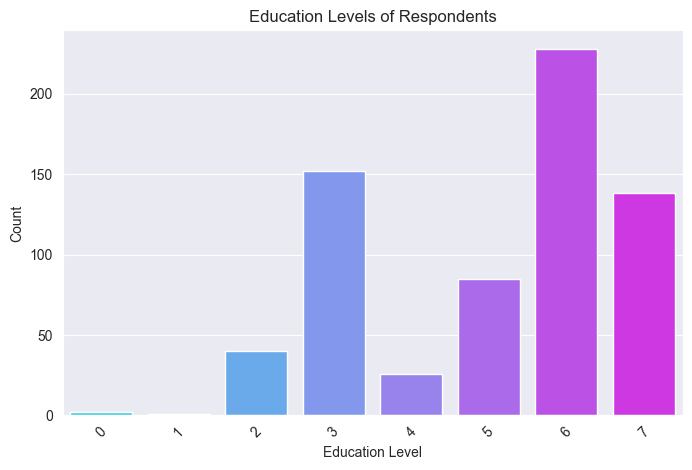

In [25]:
# 4. Education Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='d_3_education', data=bank_df, palette='cool')
plt.title('Education Levels of Respondents')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The majority of respondents hold at least a bachelor’s degree, while fewer fall into lower education levels. This may influence financial awareness and service usage.**

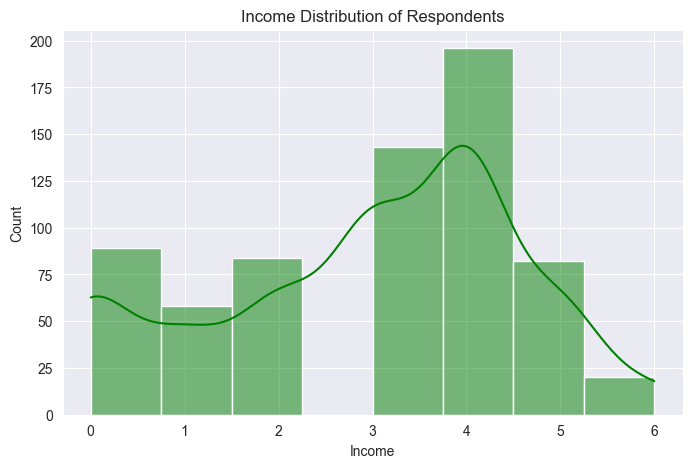

In [31]:
# 5. Income distribution
plt.figure(figsize=(8,5))
sns.histplot(bank_df['d_6_income'], bins=8, kde=True, color='green')
plt.title('Income Distribution of Respondents')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

**Income distribution is right-skewed, with most respondents earning in the lower-to-mid ranges. A few high-income outliers are present.**

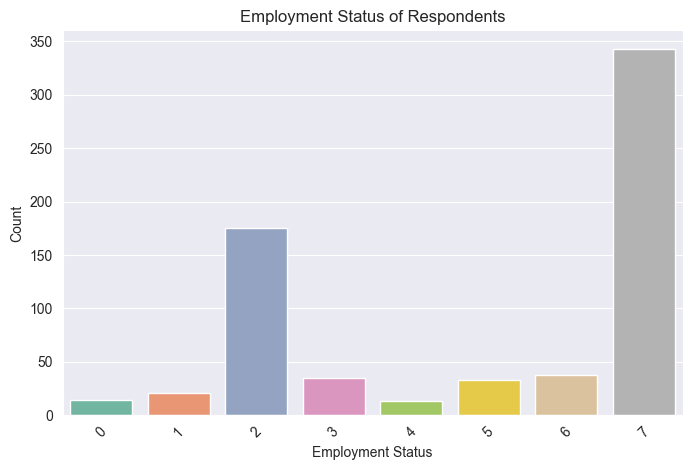

In [32]:
# 6. Employment Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='d_4_employment', data=bank_df, palette='Set2')
plt.title('Employment Status of Respondents')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Most respondents work in professional and business-related roles, while fewer are in farming or clerical jobs. This suggests the customer base is more urban and career-driven.**

Phase 5 — Construct-Level Exploration
----

Purpose: Understand individual items and detect issues.

In [36]:
bank_df.columns

Index(['a_1_age', 'loy_1', 'qual_1', 'qual_2', 'qual_4', 'qual_5', 'qual_6',
       'qua_7', 'perf_1', 'perf_2', 'perf_3', 'perf_4', 'perf_5', 'csor_1',
       'csor_2', 'csor_3', 'csor_4', 'csor_5', 'attr_1', 'attr_2', 'attr_3',
       'attr_4', 'like_1', 'like_2', 'comp_1', 'comp_2', 'comp_3', 'sat_1',
       'sat_2', 'sat_3', 'loy_2', 'loy_3', 'trust_1', 'trust_2', 'trust_3',
       'trust_4', 'd_1_gender', 'd_2_family', 'd_3_education',
       'd_4_employment', 'd_6_income'],
      dtype='object')

In [47]:
# Descriptive statistics for the QUAL construct
print("Descriptive Stats for QUAL construct")
print(bank_df[['qual_1', 'qual_2', 'qual_4', 'qual_5', 'qual_6', 'qua_7']].describe())

Descriptive Stats for QUAL construct
           qual_1      qual_2      qual_4      qual_5      qual_6       qua_7
count  672.000000  672.000000  672.000000  672.000000  672.000000  672.000000
mean     5.443452    5.430060    5.808036    5.357143    5.095238    4.712798
std      1.259155    1.264388    1.207426    1.248717    1.409942    1.350371
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      5.000000    5.000000    5.000000    4.000000    4.000000    4.000000
50%      6.000000    6.000000    6.000000    6.000000    5.000000    4.000000
75%      6.000000    6.000000    7.000000    6.000000    6.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000


Descriptive Stats for QUAL construct
           qual_1      qual_2      qual_4      qual_5      qual_6       qua_7
count  672.000000  672.000000  672.000000  672.000000  672.000000  672.000000
mean     5.443452    5.430060    5.808036    5.357143    5.095238    4.712798
std      1.259155    1.264388    1.207426    1.248717    1.409942    1.350371
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      5.000000    5.000000    5.000000    4.000000    4.000000    4.000000
50%      6.000000    6.000000    6.000000    6.000000    5.000000    4.000000
75%      6.000000    6.000000    7.000000    6.000000    6.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000


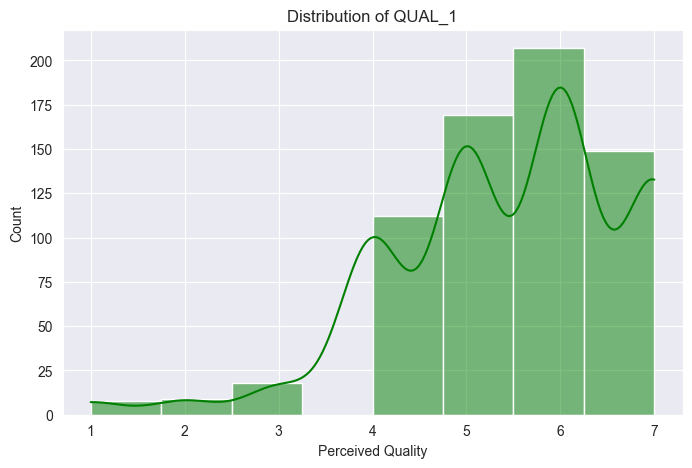

In [46]:
# Distribution plot for qual_1
plt.figure(figsize=(8,5))
sns.histplot(bank_df['qual_1'], bins=8, kde=True, color='green')
plt.title("Distribution of QUAL_1")
plt.xlabel('Perceived Quality')
plt.ylabel('Count')
plt.show()

**This histogram shows that customer responses for attention to their concerns are heavily concentrated on the higher end of the scale, particularly at ratings of 5, 6, and 7. This indicates that most customers feel their main bank pays great attention to their concerns.**

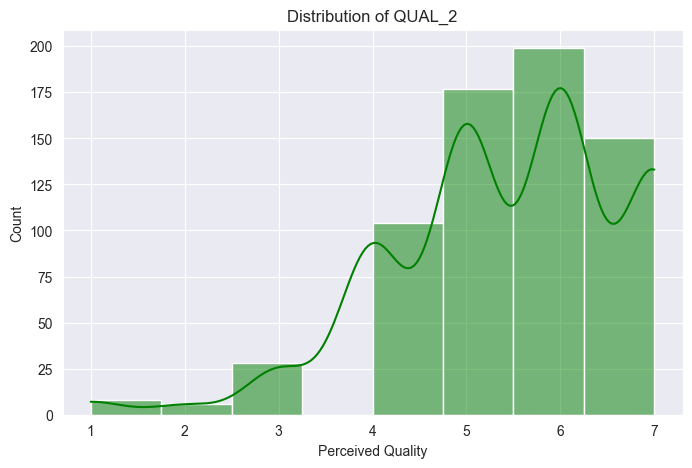

In [49]:
# Distribution plot for qual_2
plt.figure(figsize=(8,5))
sns.histplot(bank_df['qual_2'], bins=8, kde=True, color='green')
plt.title("Distribution of QUAL_2")
plt.xlabel('Perceived Quality')
plt.ylabel('Count')
plt.show()

**The distribution for perceived modernity is also highly skewed towards the top of the scale, with a large majority of responses at 6 and 7. This suggests that customers generally view their bank as modern and state-of-the-art.**

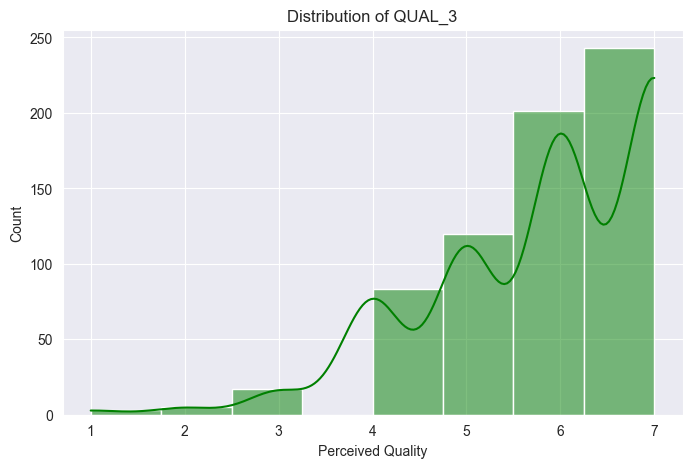

In [51]:
# Distribution plot for qual_3
plt.figure(figsize=(8,5))
sns.histplot(bank_df['qual_4'], bins=8, kde=True, color='green')
plt.title("Distribution of QUAL_3")
plt.xlabel('Perceived Quality')
plt.ylabel('Count')
plt.show()


# Descriptive Stats for QUAL construct
           qual_1      qual_2      qual_4      qual_5      qual_6
count  672.000000  672.000000  672.000000  672.000000  672.000000
mean     5.443452    5.430060    5.808036    5.357143    5.095238
std      1.259155    1.264388    1.207426    1.248717    1.409942
min      1.000000    1.000000    1.000000    1.000000    1.000000
25%      5.000000    5.000000    5.000000    4.000000    4.000000
50%      6.000000    6.000000    6.000000    6.000000    5.000000
75%      6.000000    6.000000    7.000000    6.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000    7.000000


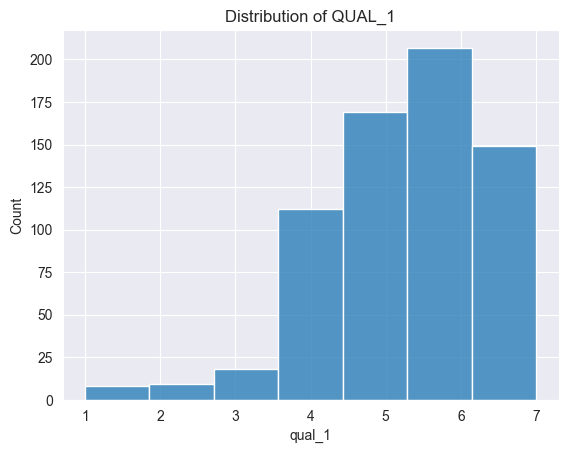

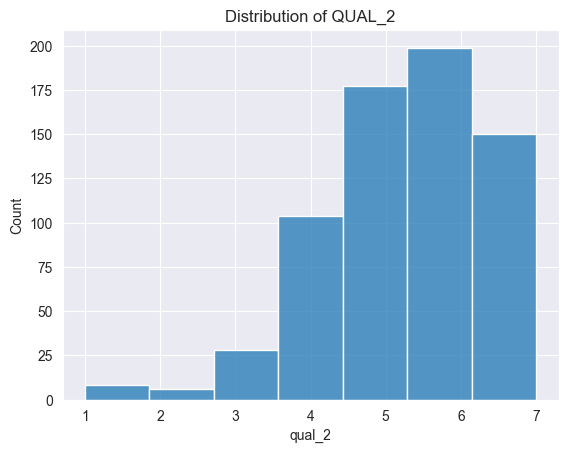

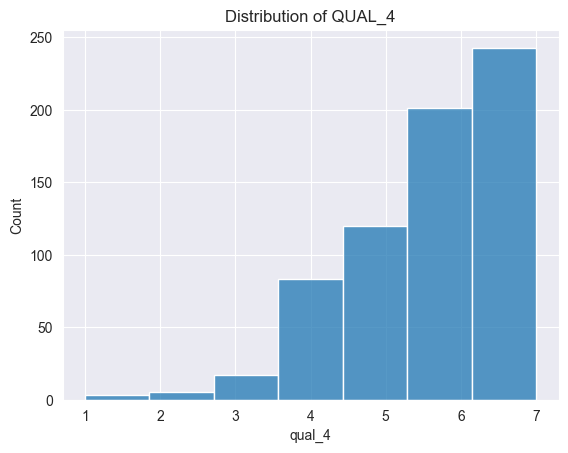

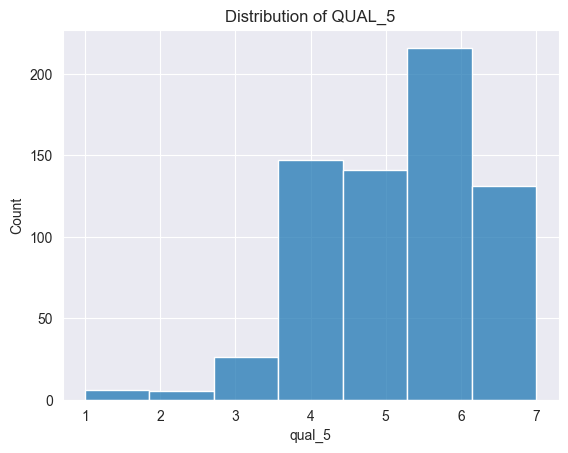

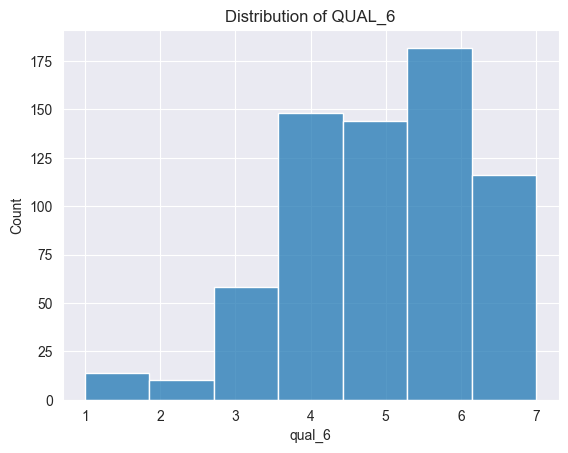


# Descriptive Stats for PERF construct
           perf_1      perf_2      perf_3      perf_4      perf_5
count  672.000000  672.000000  672.000000  672.000000  672.000000
mean     5.775298    5.684524    5.327381    5.324405    5.056548
std      1.100785    1.140711    1.242549    1.195670    1.268588
min      1.000000    1.000000    1.000000    1.000000    1.000000
25%      5.000000    5.000000    4.000000    4.000000    4.000000
50%      6.000000    6.000000    5.000000    5.000000    5.000000
75%      7.000000    7.000000    6.000000    6.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000    7.000000


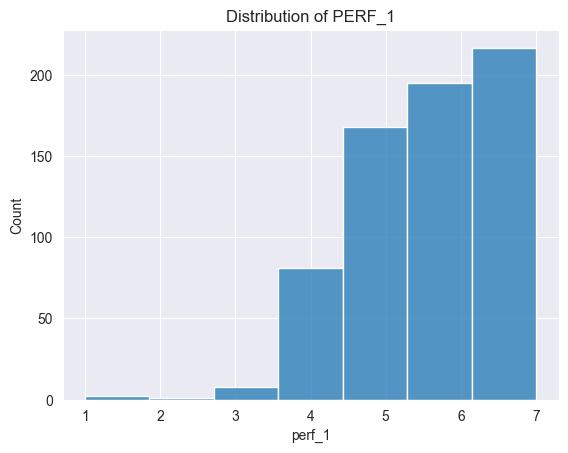

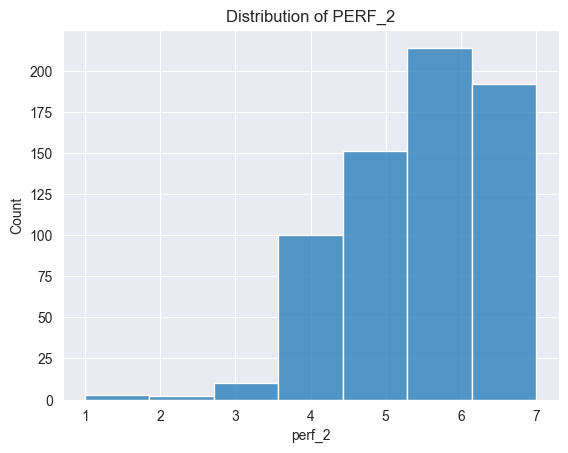

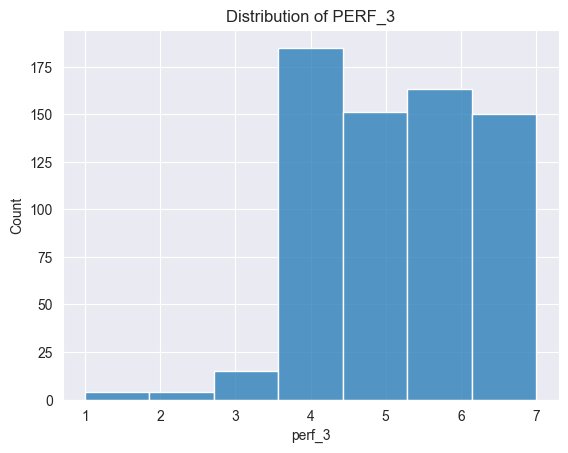

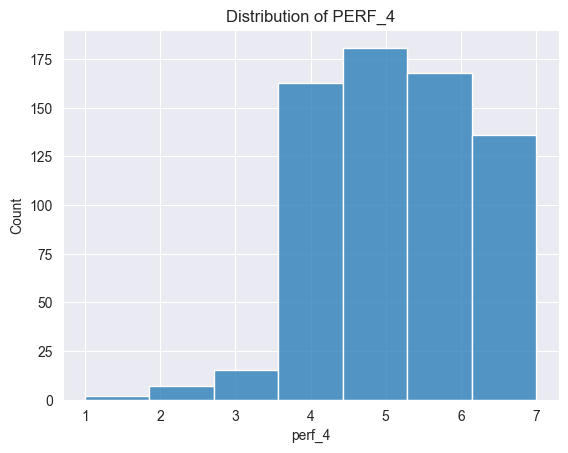

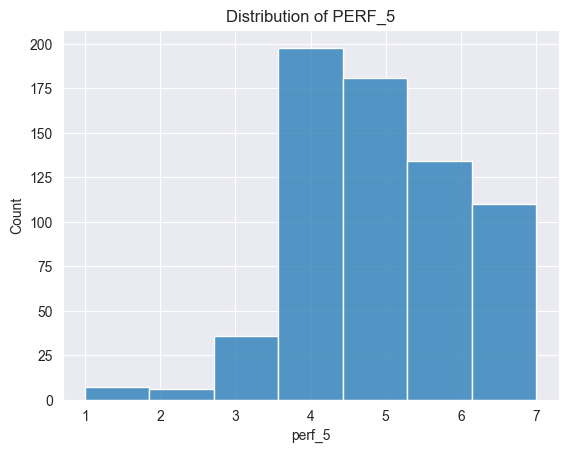


# Descriptive Stats for CSOR construct
           csor_1      csor_2      csor_3      csor_4      csor_5
count  672.000000  672.000000  672.000000  672.000000  672.000000
mean     4.513393    4.537202    5.081845    5.122024    5.160714
std      1.470971    1.243205    1.180125    1.212204    1.164965
min      1.000000    1.000000    1.000000    1.000000    1.000000
25%      4.000000    4.000000    4.000000    4.000000    4.000000
50%      4.000000    4.000000    5.000000    5.000000    5.000000
75%      6.000000    5.000000    6.000000    6.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000    7.000000


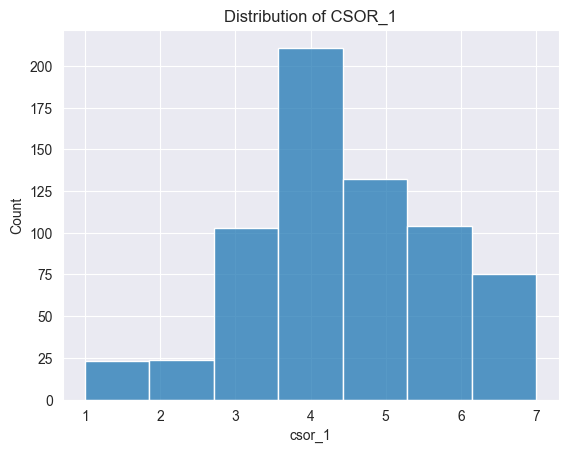

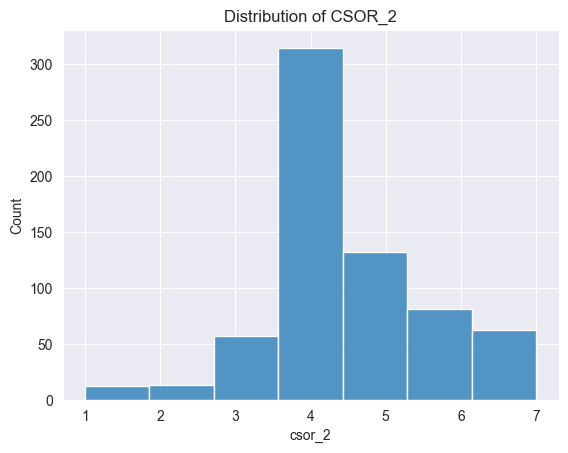

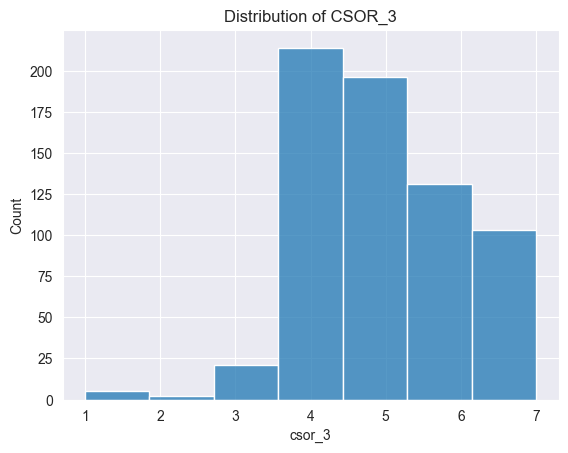

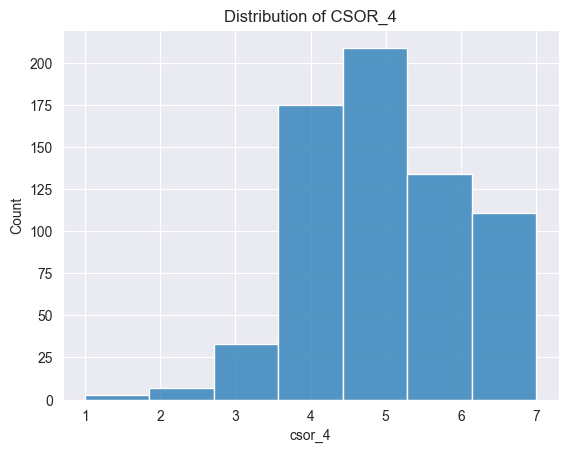

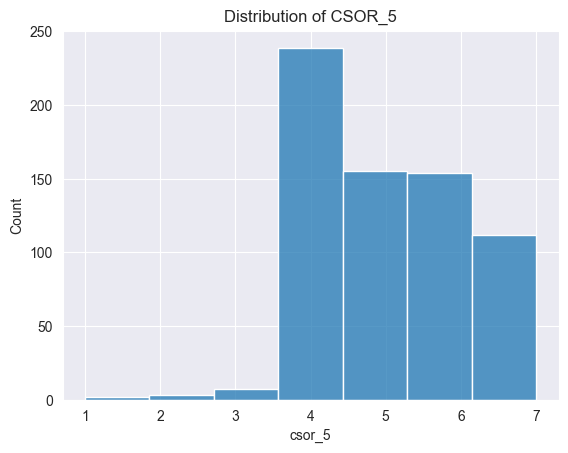


# Descriptive Stats for ATTR construct
           attr_1      attr_2      attr_3      attr_4
count  672.000000  672.000000  672.000000  672.000000
mean     5.308036    5.355655    5.303571    4.101190
std      1.198134    1.215890    1.242606    1.810352
min      1.000000    1.000000    1.000000    1.000000
25%      4.000000    5.000000    4.000000    3.000000
50%      5.000000    5.000000    5.000000    4.000000
75%      6.000000    6.000000    6.000000    5.000000
max      7.000000    7.000000    7.000000    7.000000


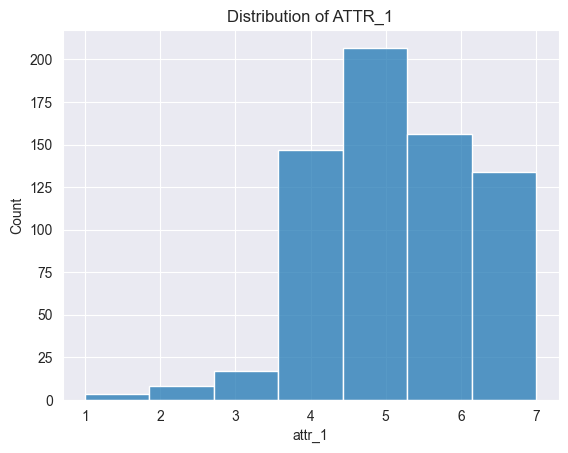

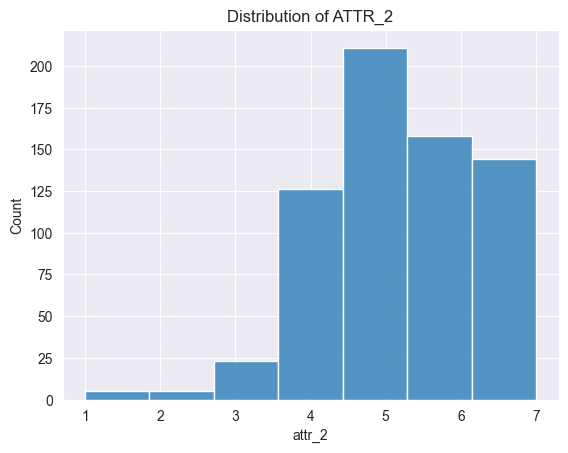

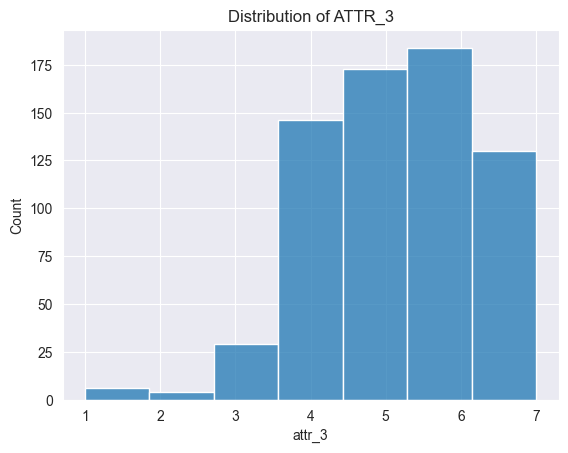

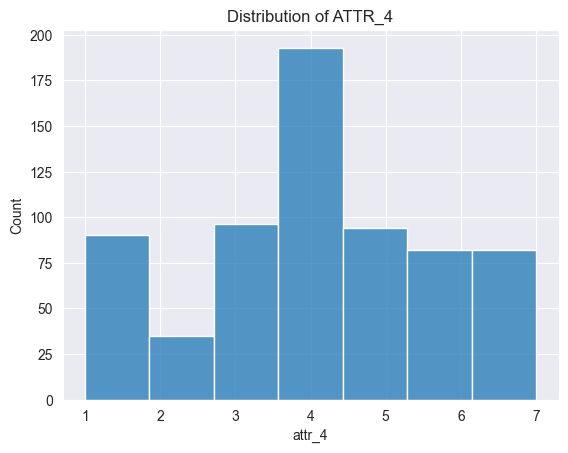


# Descriptive Stats for LIKE construct
           like_1      like_2
count  672.000000  672.000000
mean     5.266369    5.357143
std      1.303052    1.490299
min      1.000000    1.000000
25%      4.000000    4.000000
50%      5.000000    6.000000
75%      6.000000    7.000000
max      7.000000    7.000000


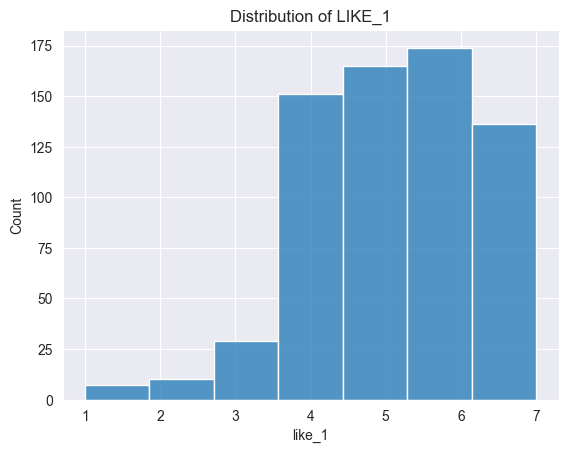

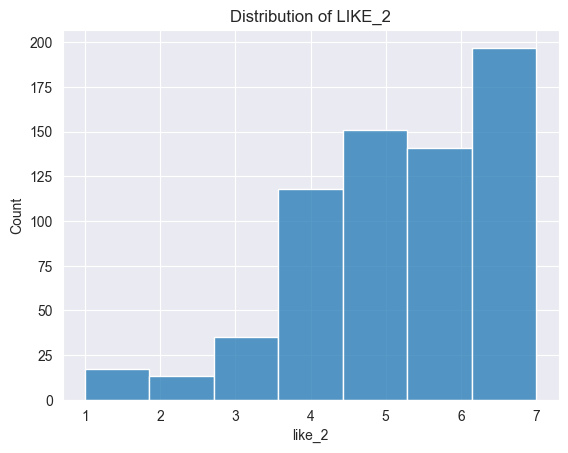


# Descriptive Stats for COMP construct
           comp_1      comp_2      comp_3
count  672.000000  672.000000  672.000000
mean     4.720238    5.650298    5.174107
std      1.261256    1.059215    1.221168
min      1.000000    1.000000    1.000000
25%      4.000000    5.000000    4.000000
50%      5.000000    6.000000    5.000000
75%      5.250000    7.000000    6.000000
max      7.000000    7.000000    7.000000


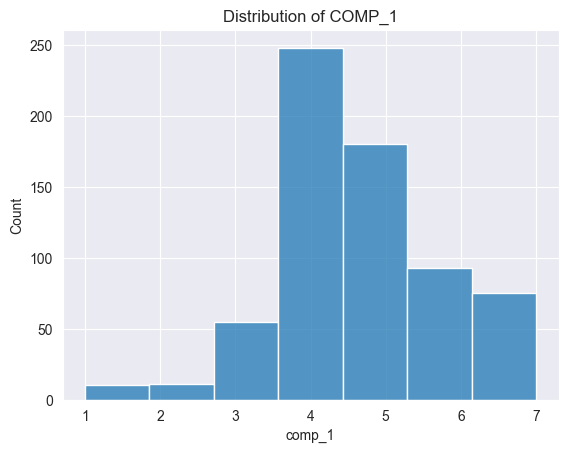

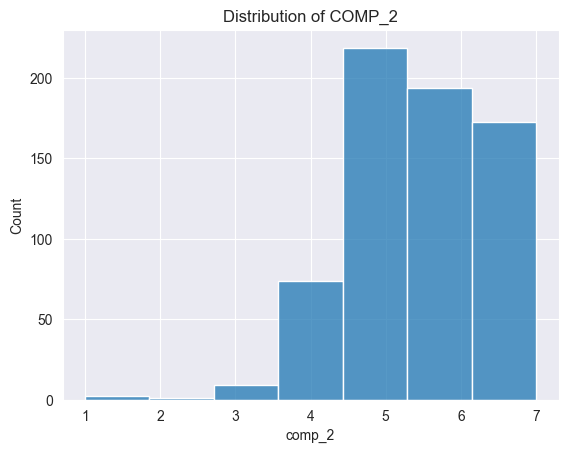

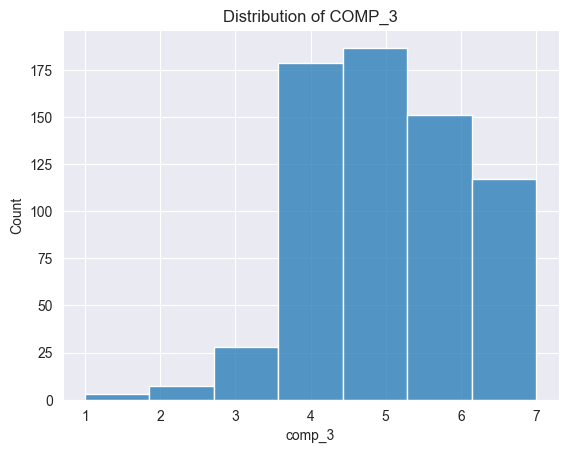


# Descriptive Stats for SAT construct
            sat_1       sat_2       sat_3
count  672.000000  672.000000  672.000000
mean     5.571429    5.629464    5.669643
std      1.272530    1.245401    1.361960
min      1.000000    1.000000    1.000000
25%      5.000000    5.000000    5.000000
50%      6.000000    6.000000    6.000000
75%      7.000000    7.000000    7.000000
max      7.000000    7.000000    7.000000


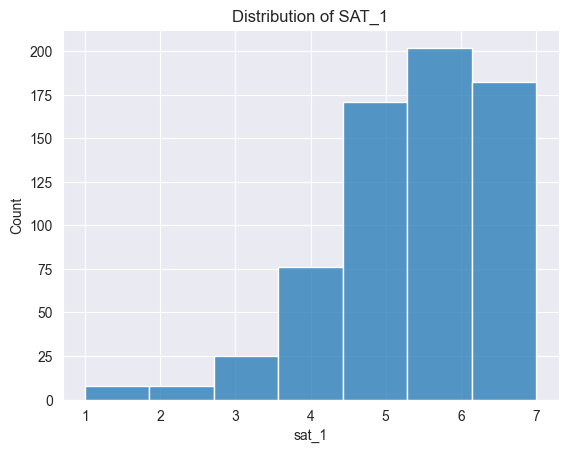

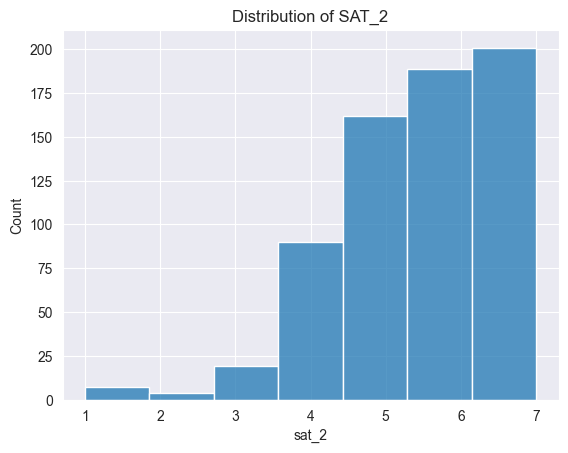

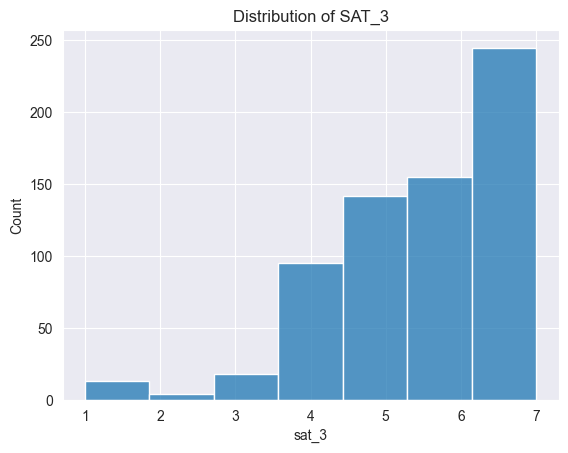


# Descriptive Stats for LOY construct
            loy_1       loy_2      loy_3
count  672.000000  672.000000  672.00000
mean     5.943452    4.851190    4.13244
std      1.414135    1.547614    1.56680
min      1.000000    1.000000    1.00000
25%      5.000000    4.000000    3.00000
50%      6.000000    5.000000    4.00000
75%      7.000000    6.000000    5.00000
max      7.000000    7.000000    7.00000


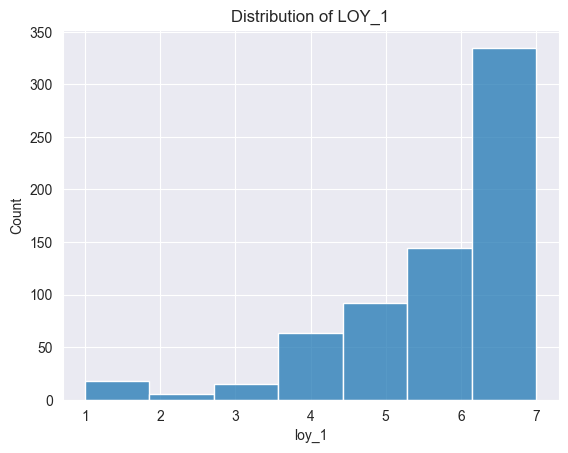

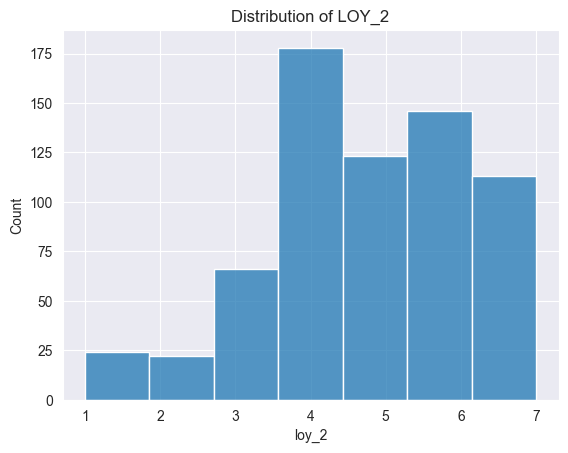

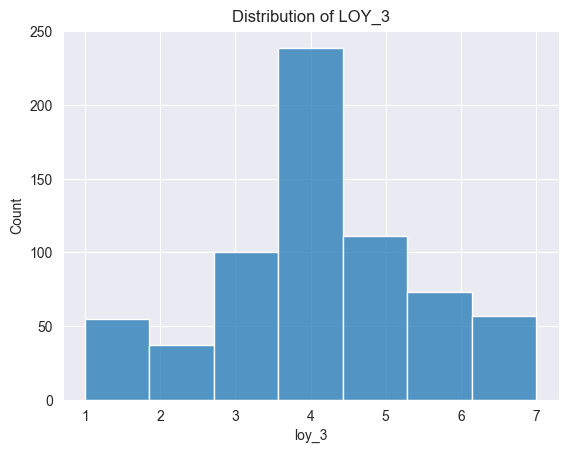


# Descriptive Stats for TRUST construct
          trust_1     trust_2     trust_3     trust_4
count  672.000000  672.000000  672.000000  672.000000
mean     5.486607    5.331845    4.845238    5.080357
std      1.299937    1.322171    1.361546    1.364692
min      1.000000    1.000000    1.000000    1.000000
25%      5.000000    4.000000    4.000000    4.000000
50%      6.000000    5.000000    5.000000    5.000000
75%      7.000000    6.000000    6.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000


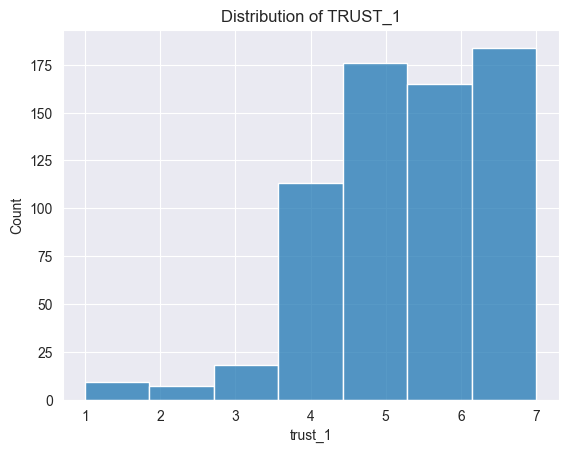

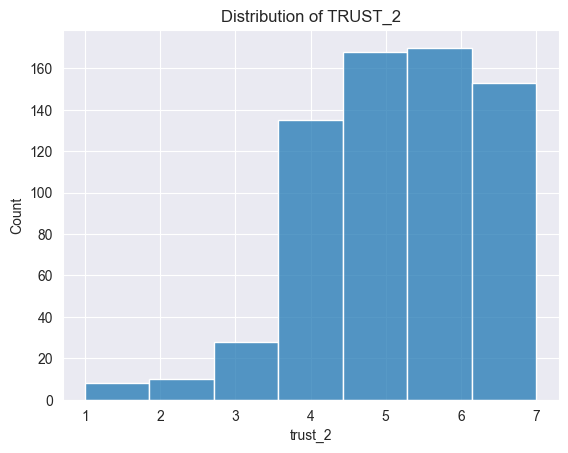

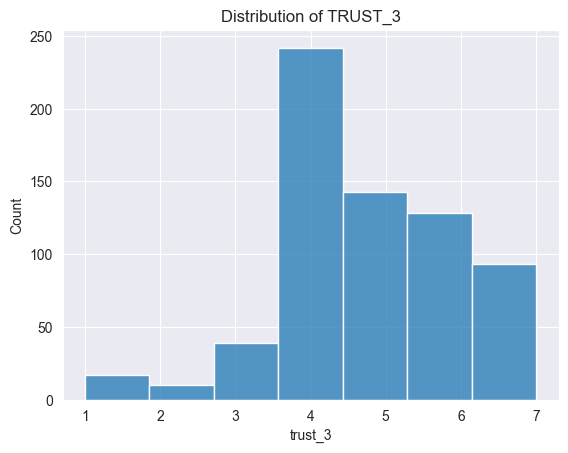

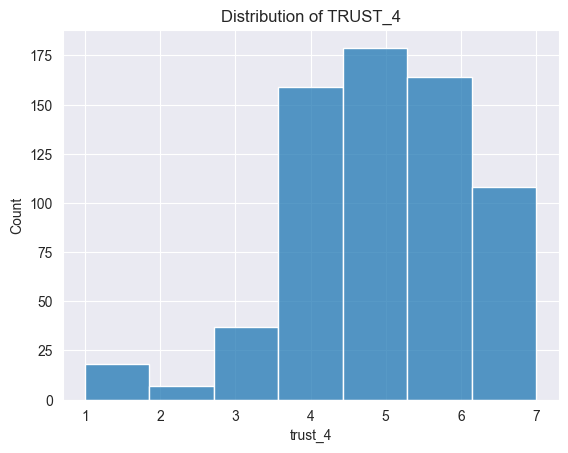

In [14]:
# Loop through each construct in the dictionary
for construct_name, columns in constructs.items():
    # Descriptive statistics
    print(f"\n# Descriptive Stats for {construct_name.upper()} construct")
    print(bank_df[columns].describe())

    # Distribution plots
    for col in columns:
        sns.histplot(bank_df[col], bins=7, kde=False)
        plt.title(f"Distribution of {col.upper()}")
        plt.show()


Phase 6 — Scale Reliability Check Prep
----

Purpose: Check internal consistency.

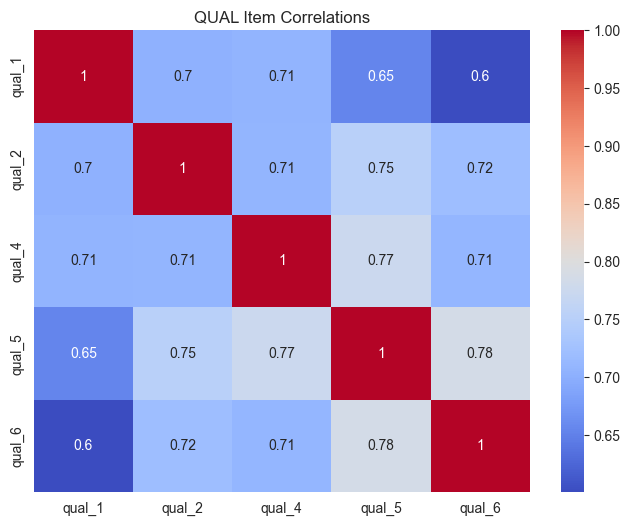

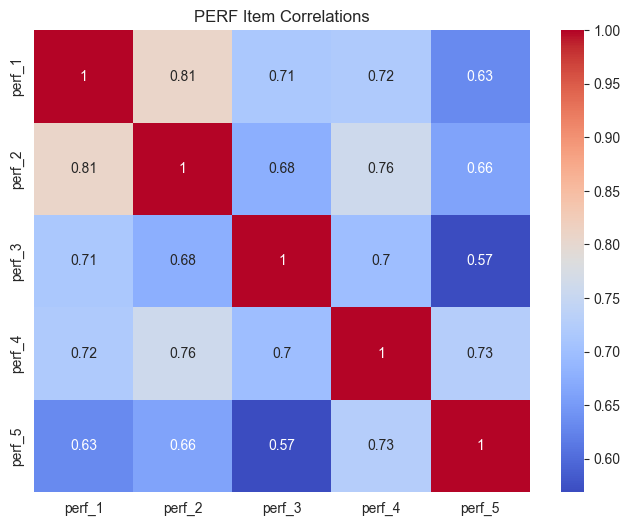

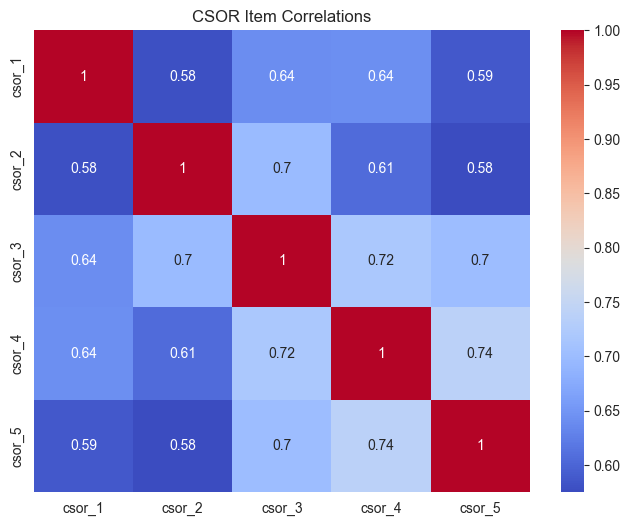

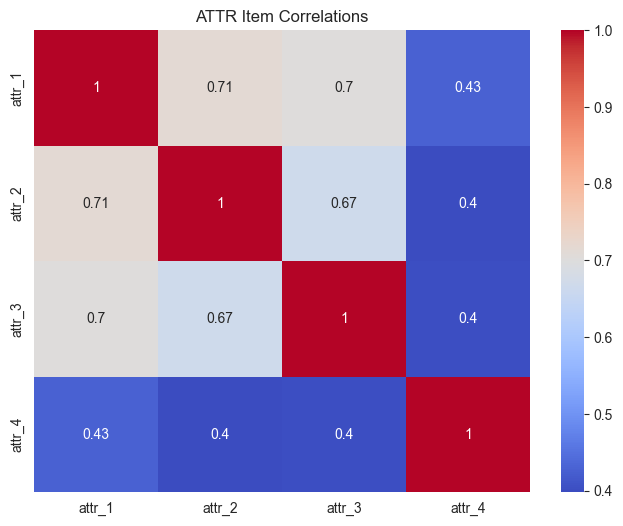

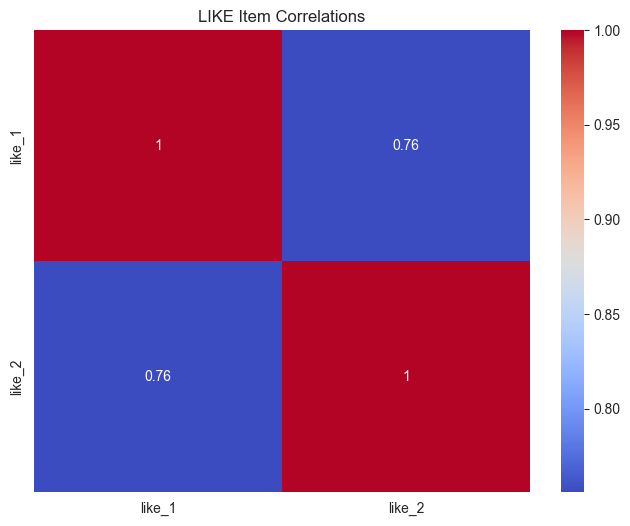

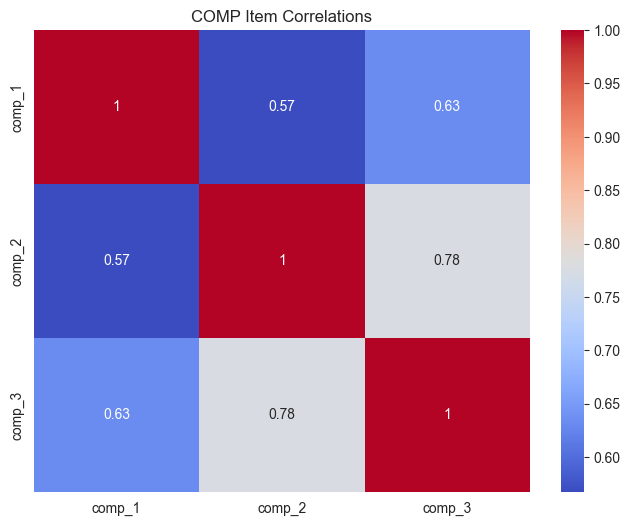

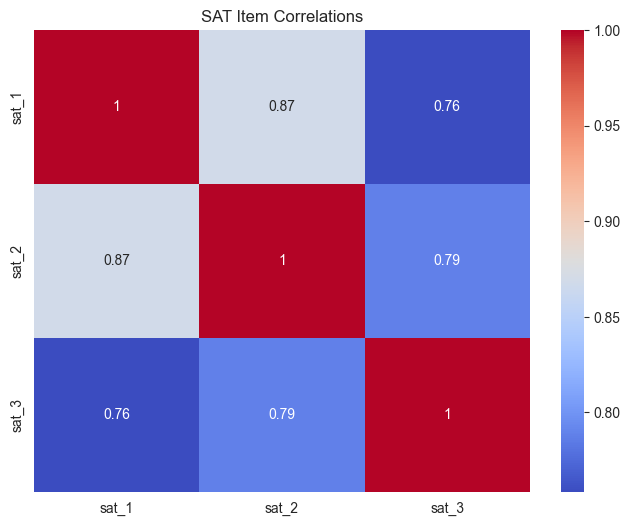

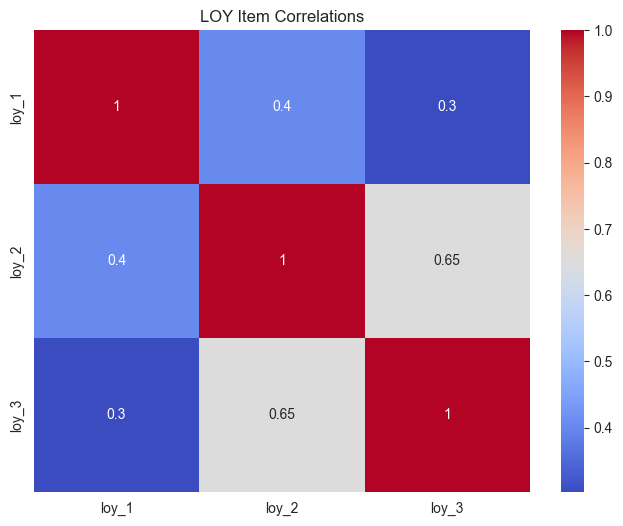

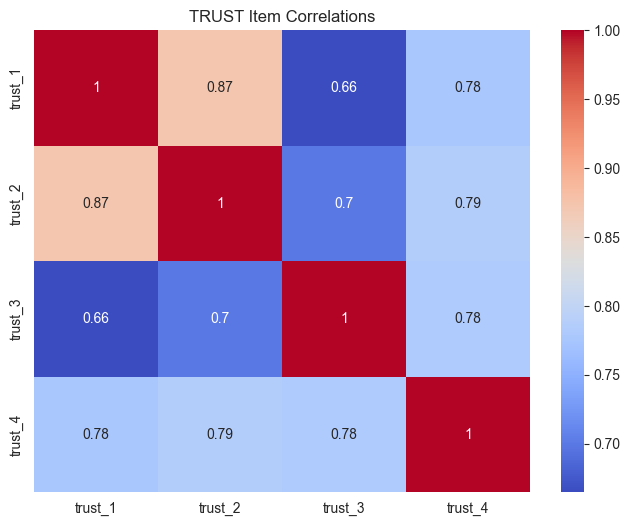

In [15]:
#Simple inter-item correlation heatmap
# Loop through constructs and plot heatmap for each
for name, cols in constructs.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(bank_df[cols].corr(), annot=True, cmap='coolwarm')
    plt.title(f"{name.upper()} Item Correlations")
    plt.show()


Phase 7 — Response Pattern Checks
----

Purpose: Spot straight-lining or bias.